# Archivo para comparar varios modelos

In [1]:
import dataAcquisition
import ReparameterizationTrick
import Encoder
import Decoder
import VAE
import loss
import train
import Predictor
import importlib
import numpy as np
import tensorflow as tf
tf.config.run_functions_eagerly(False)


In [2]:
importlib.reload(dataAcquisition)

x_train, x_val, y_train, y_val, average_image, x_train_mix, x_test_mix,x_train_1, y_train_1 =  dataAcquisition.data_acquisition()

x_train(60k).shape:       (60000, 28, 28)
y_train.shape:            (60000,)
x_test(10k).shape:        (10000, 28, 28)
x_train_C.shape:     (55000, 28, 28, 1)
x_val_C.shape:     (5000, 28, 28, 1)
x_test_C.shape:      (10000, 28, 28, 1)
x_train.shape:       (55000, 28, 28)
x_val.shape:       (5000, 28, 28)
x_test.shape:       (10000, 28, 28)
x_train_mix.shape:  (55000, 28, 28)
x_test_mix.shape:  (10000, 28, 28)


In [3]:
import VAE
importlib.reload(VAE)

espacio_latente = [2, 4, 8, 16, 32,64,128,256]
modelos = []
for laten in espacio_latente:
    modelos.append(VAE.definir_modelo(x_train, y_train, latent_dim = laten, show_model=False) )
        

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 784)       │          0 │ input_img[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 794)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ encoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    101,760 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 2)         │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 102,276 (399.52 KB)

 Trainable params: 102,276 (399.52 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_sampling          │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 12)        │          0 │ z_sampling[0][0], │
│ (Concatenate)       │                   │            │ decoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │      1,664 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 784)       │    101,136 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 28, 28, 1) │          0 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 102,800 (401.56 KB)

 Trainable params: 102,800 (401.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ [(None, 2),       │    102,276 │ input_img[0][0],  │
│ (Functional)        │ (None, 2), (None, │            │ encoder_conditio… │
│                     │ 2)]               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 28, 28, 1) │    102,800 │ encoder[0][2],    │
│ (Functional)        │                   │            │ decoder_conditio… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 205,076 (801.08 KB)

 Trainable params: 205,076 (801.08 KB)

 Non-trainable params: 0 (0.00 B)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 784)       │          0 │ input_img[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 794)       │          0 │ flatten_1[0][0],  │
│ (Concatenate)       │                   │            │ encoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │    101,760 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 4)         │        516 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 4)         │        516 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_1          │ (None, 4)         │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 102,792 (401.53 KB)

 Trainable params: 102,792 (401.53 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_sampling          │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 14)        │          0 │ z_sampling[0][0], │
│ (Concatenate)       │                   │            │ decoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │      1,920 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 784)       │    101,136 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 28, 28, 1) │          0 │ dense_5[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 103,056 (402.56 KB)

 Trainable params: 103,056 (402.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ [(None, 4),       │    102,792 │ input_img[0][0],  │
│ (Functional)        │ (None, 4), (None, │            │ encoder_conditio… │
│                     │ 4)]               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 28, 28, 1) │    103,056 │ encoder[0][2],    │
│ (Functional)        │                   │            │ decoder_conditio… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 205,848 (804.09 KB)

 Trainable params: 205,848 (804.09 KB)

 Non-trainable params: 0 (0.00 B)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 784)       │          0 │ input_img[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 794)       │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ encoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │    101,760 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 8)         │      1,032 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 8)         │      1,032 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_2          │ (None, 8)         │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 103,824 (405.56 KB)

 Trainable params: 103,824 (405.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_sampling          │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 18)        │          0 │ z_sampling[0][0], │
│ (Concatenate)       │                   │            │ decoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 128)       │      2,432 │ concatenate_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 784)       │    101,136 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 28, 28, 1) │          0 │ dense_8[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 103,568 (404.56 KB)

 Trainable params: 103,568 (404.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ [(None, 8),       │    103,824 │ input_img[0][0],  │
│ (Functional)        │ (None, 8), (None, │            │ encoder_conditio… │
│                     │ 8)]               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 28, 28, 1) │    103,568 │ encoder[0][2],    │
│ (Functional)        │                   │            │ decoder_conditio… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 207,392 (810.12 KB)

 Trainable params: 207,392 (810.12 KB)

 Non-trainable params: 0 (0.00 B)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 784)       │          0 │ input_img[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 794)       │          0 │ flatten_3[0][0],  │
│ (Concatenate)       │                   │            │ encoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 128)       │    101,760 │ concatenate_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 16)        │      2,064 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 16)        │      2,064 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_3          │ (None, 16)        │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 105,888 (413.62 KB)

 Trainable params: 105,888 (413.62 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_sampling          │ (None, 16)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_7       │ (None, 26)        │          0 │ z_sampling[0][0], │
│ (Concatenate)       │                   │            │ decoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 128)       │      3,456 │ concatenate_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 784)       │    101,136 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_3 (Reshape) │ (None, 28, 28, 1) │          0 │ dense_11[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 104,592 (408.56 KB)

 Trainable params: 104,592 (408.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ [(None, 16),      │    105,888 │ input_img[0][0],  │
│ (Functional)        │ (None, 16),       │            │ encoder_conditio… │
│                     │ (None, 16)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 28, 28, 1) │    104,592 │ encoder[0][2],    │
│ (Functional)        │                   │            │ decoder_conditio… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 210,480 (822.19 KB)

 Trainable params: 210,480 (822.19 KB)

 Non-trainable params: 0 (0.00 B)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 784)       │          0 │ input_img[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 794)       │          0 │ flatten_4[0][0],  │
│ (Concatenate)       │                   │            │ encoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │    101,760 │ concatenate_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 32)        │      4,128 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 32)        │      4,128 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_4          │ (None, 32)        │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 110,016 (429.75 KB)

 Trainable params: 110,016 (429.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_sampling          │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 42)        │          0 │ z_sampling[0][0], │
│ (Concatenate)       │                   │            │ decoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 128)       │      5,504 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 784)       │    101,136 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_4 (Reshape) │ (None, 28, 28, 1) │          0 │ dense_14[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 106,640 (416.56 KB)

 Trainable params: 106,640 (416.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ [(None, 32),      │    110,016 │ input_img[0][0],  │
│ (Functional)        │ (None, 32),       │            │ encoder_conditio… │
│                     │ (None, 32)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 28, 28, 1) │    106,640 │ encoder[0][2],    │
│ (Functional)        │                   │            │ decoder_conditio… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 216,656 (846.31 KB)

 Trainable params: 216,656 (846.31 KB)

 Non-trainable params: 0 (0.00 B)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 784)       │          0 │ input_img[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 794)       │          0 │ flatten_5[0][0],  │
│ (Concatenate)       │                   │            │ encoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 128)       │    101,760 │ concatenate_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 64)        │      8,256 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 64)        │      8,256 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_5          │ (None, 64)        │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 118,272 (462.00 KB)

 Trainable params: 118,272 (462.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_sampling          │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_11      │ (None, 74)        │          0 │ z_sampling[0][0], │
│ (Concatenate)       │                   │            │ decoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 128)       │      9,600 │ concatenate_11[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 784)       │    101,136 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_5 (Reshape) │ (None, 28, 28, 1) │          0 │ dense_17[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 110,736 (432.56 KB)

 Trainable params: 110,736 (432.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ [(None, 64),      │    118,272 │ input_img[0][0],  │
│ (Functional)        │ (None, 64),       │            │ encoder_conditio… │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 28, 28, 1) │    110,736 │ encoder[0][2],    │
│ (Functional)        │                   │            │ decoder_conditio… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 229,008 (894.56 KB)

 Trainable params: 229,008 (894.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 784)       │          0 │ input_img[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_12      │ (None, 794)       │          0 │ flatten_6[0][0],  │
│ (Concatenate)       │                   │            │ encoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 128)       │    101,760 │ concatenate_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 128)       │     16,512 │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 128)       │     16,512 │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_6          │ (None, 128)       │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 134,784 (526.50 KB)

 Trainable params: 134,784 (526.50 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_sampling          │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_13      │ (None, 138)       │          0 │ z_sampling[0][0], │
│ (Concatenate)       │                   │            │ decoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 128)       │     17,792 │ concatenate_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 784)       │    101,136 │ dense_19[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_6 (Reshape) │ (None, 28, 28, 1) │          0 │ dense_20[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 118,928 (464.56 KB)

 Trainable params: 118,928 (464.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ [(None, 128),     │    134,784 │ input_img[0][0],  │
│ (Functional)        │ (None, 128),      │            │ encoder_conditio… │
│                     │ (None, 128)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 28, 28, 1) │    118,928 │ encoder[0][2],    │
│ (Functional)        │                   │            │ decoder_conditio… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 253,712 (991.06 KB)

 Trainable params: 253,712 (991.06 KB)

 Non-trainable params: 0 (0.00 B)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 784)       │          0 │ input_img[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_14      │ (None, 794)       │          0 │ flatten_7[0][0],  │
│ (Concatenate)       │                   │            │ encoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 128)       │    101,760 │ concatenate_14[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 256)       │     33,024 │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 256)       │     33,024 │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_7          │ (None, 256)       │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 167,808 (655.50 KB)

 Trainable params: 167,808 (655.50 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_sampling          │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_15      │ (None, 266)       │          0 │ z_sampling[0][0], │
│ (Concatenate)       │                   │            │ decoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 128)       │     34,176 │ concatenate_15[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 784)       │    101,136 │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_7 (Reshape) │ (None, 28, 28, 1) │          0 │ dense_23[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 135,312 (528.56 KB)

 Trainable params: 135,312 (528.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ [(None, 256),     │    167,808 │ input_img[0][0],  │
│ (Functional)        │ (None, 256),      │            │ encoder_conditio… │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 28, 28, 1) │    135,312 │ encoder[0][2],    │
│ (Functional)        │                   │            │ decoder_conditio… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 303,120 (1.16 MB)

 Trainable params: 303,120 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
print( modelos)

[<Functional name=vae, built=True>, <Functional name=vae, built=True>, <Functional name=vae, built=True>, <Functional name=vae, built=True>, <Functional name=vae, built=True>, <Functional name=vae, built=True>, <Functional name=vae, built=True>, <Functional name=vae, built=True>]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


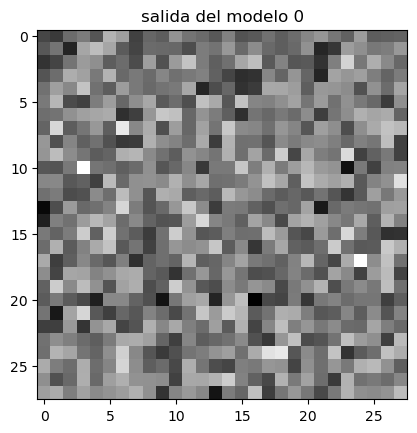

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


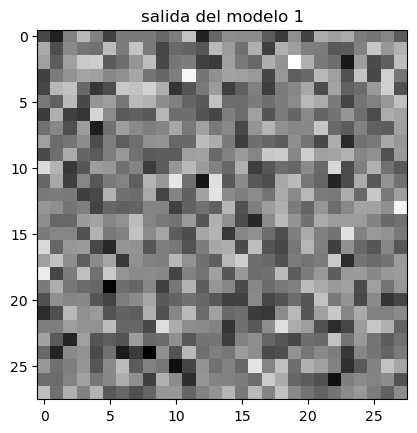

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


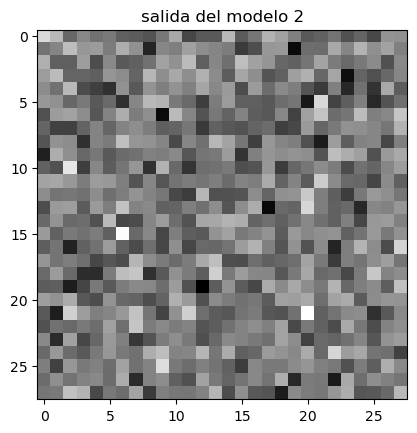

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


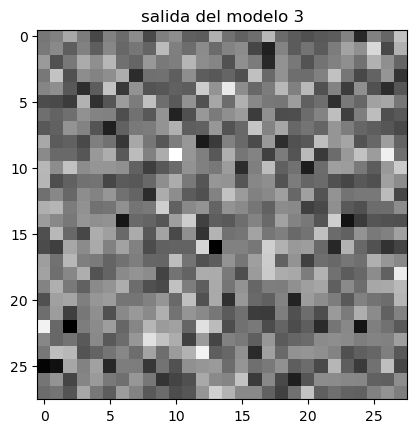

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


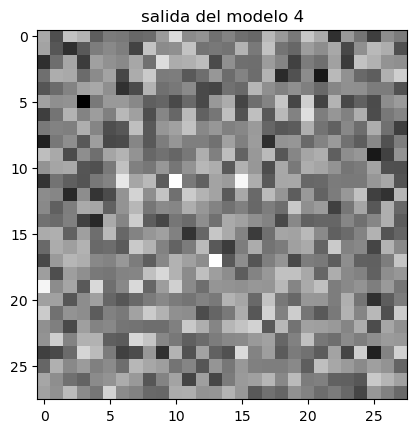

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


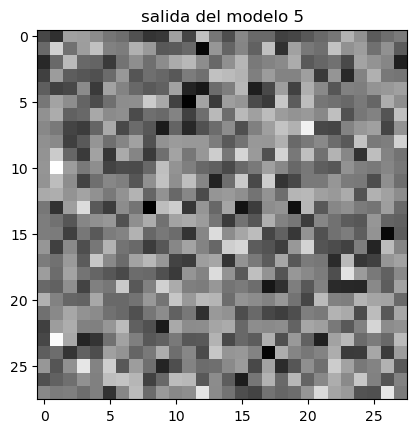

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


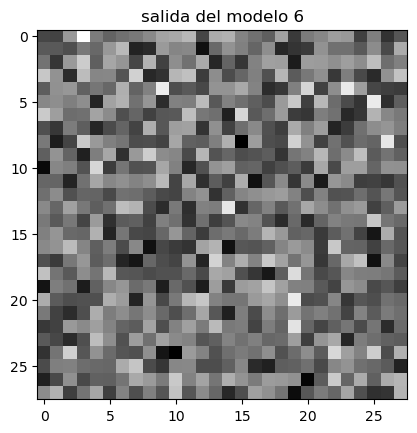

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


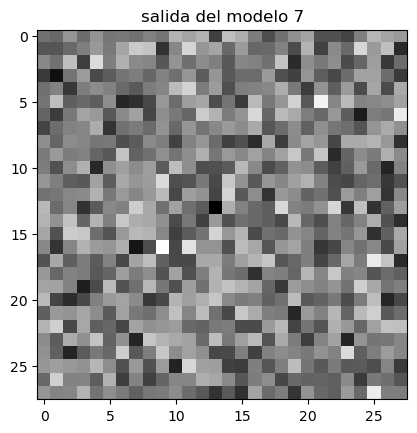

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(loss)
# Optimizer ------------------------------------------------------------------
i=0
# Compile --------------------------------------------------------------------
for vae in modelos: 
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

    vae.compile(optimizer, loss=loss.vae_loss) #cambiar nombre

    img = np.expand_dims(x_train[0], axis=0)
    cond = np.expand_dims(y_train[0], axis=0)
    salida = vae.predict([img, cond,cond])

    reconstruccion = salida[0].reshape(28, 28)
    plt.imshow(reconstruccion, cmap='gray')
    plt.title(f"salida del modelo {i}")
    plt.show()
    i += 1

MODELO NÚMERO: 0
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 60.0177 - val_loss: 30.9470
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


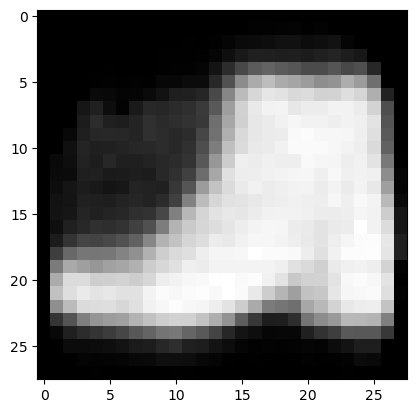

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 28.6474 - val_loss: 27.5124
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


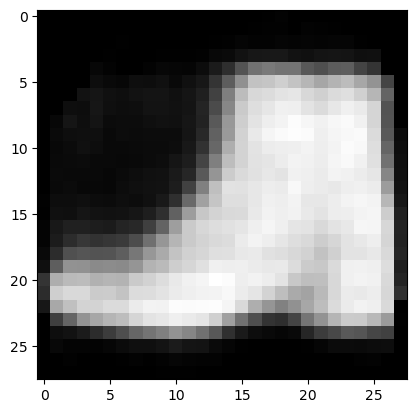

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 26.6393 - val_loss: 26.6926
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


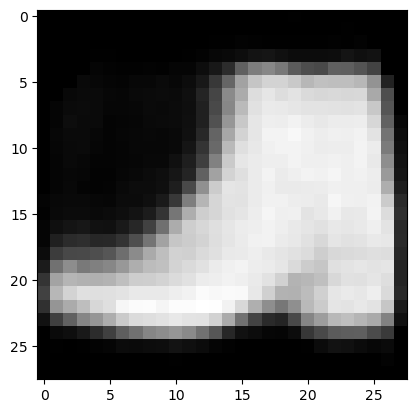

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 25.7892 - val_loss: 26.1970
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


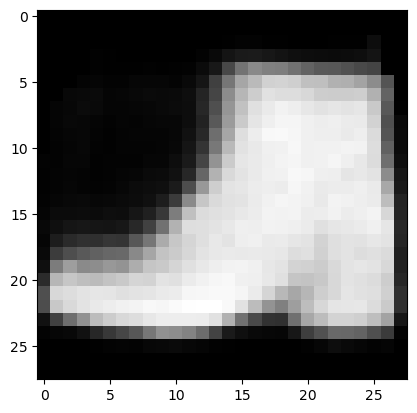

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 25.4082 - val_loss: 26.0817
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


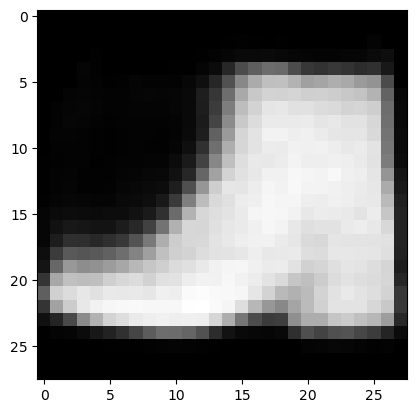

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 25.0915 - val_loss: 25.7651
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


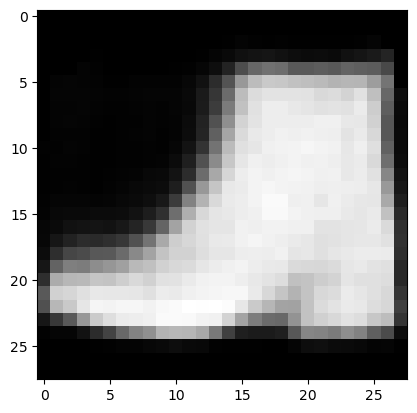

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 25.1889 - val_loss: 25.8115
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


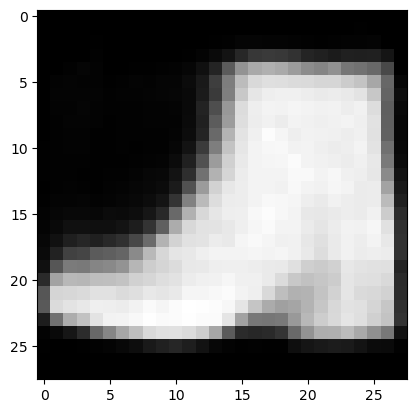

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 24.6483 - val_loss: 25.4642
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


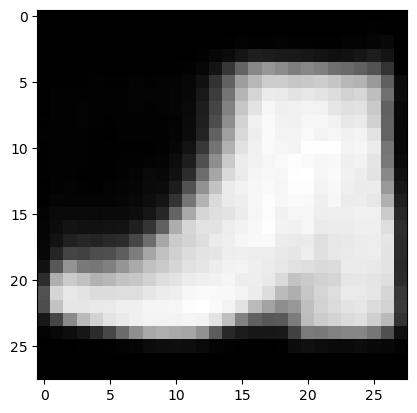

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 24.6373 - val_loss: 25.4674
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


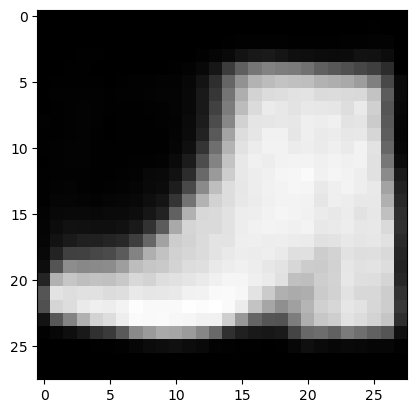

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 24.6016 - val_loss: 25.3430
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


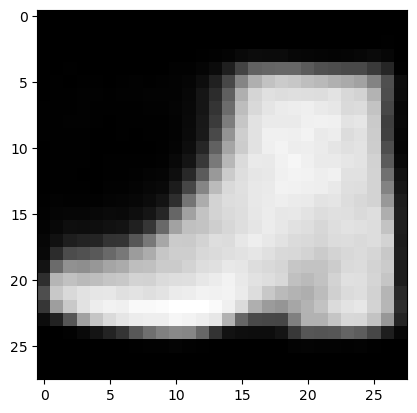

MODELO NÚMERO: 0
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 55.9955 - val_loss: 25.8630
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


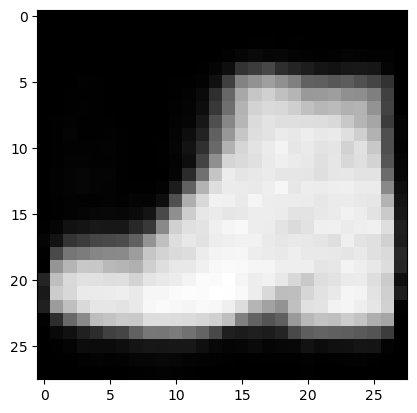

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 24.4697 - val_loss: 23.7186
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


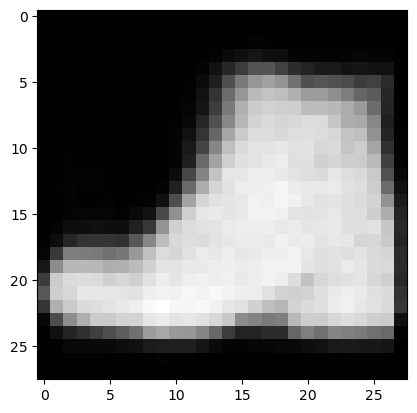

430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 22.9158 - val_loss: 22.6162
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


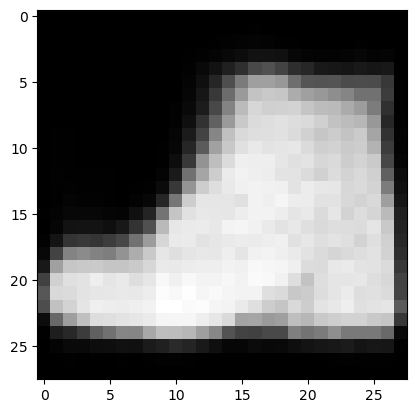

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 22.0524 - val_loss: 22.1913
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


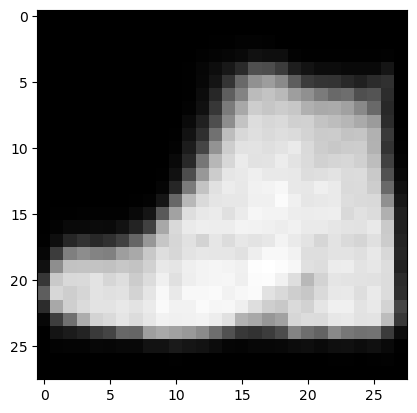

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 21.5690 - val_loss: 21.7449
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


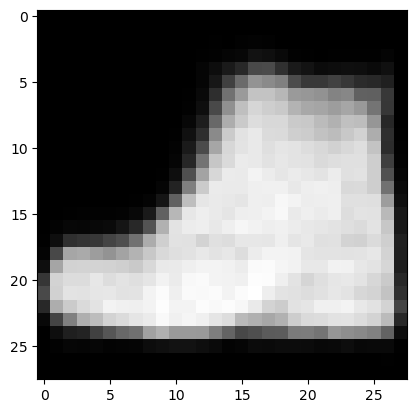

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 21.0180 - val_loss: 21.3205
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


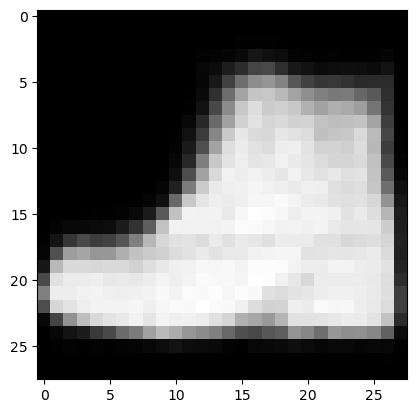

430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 20.6783 - val_loss: 21.2565
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


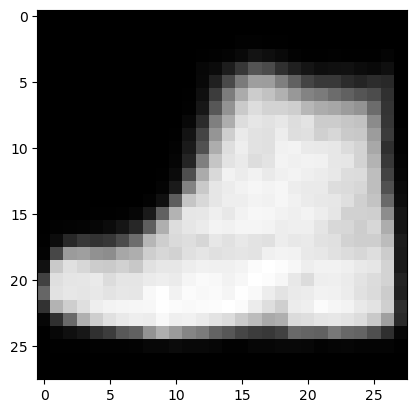

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 20.2615 - val_loss: 20.9847
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


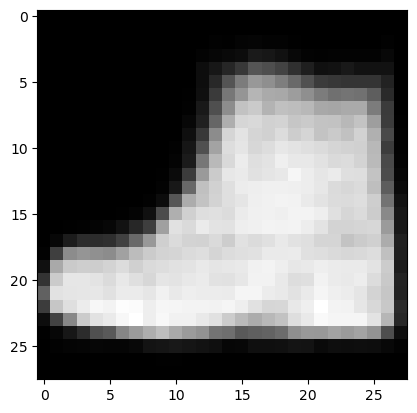

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 20.1853 - val_loss: 20.8968
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


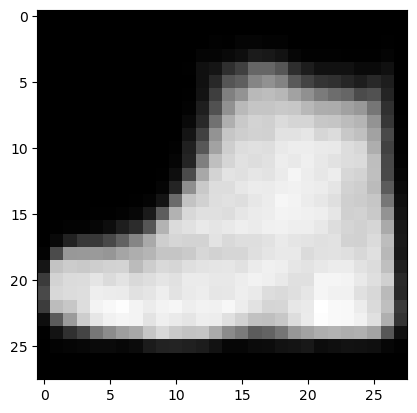

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 20.3313 - val_loss: 20.7971
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


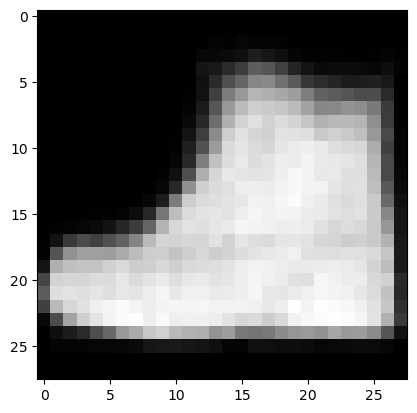

MODELO NÚMERO: 0
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 50.7052 - val_loss: 22.4874
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


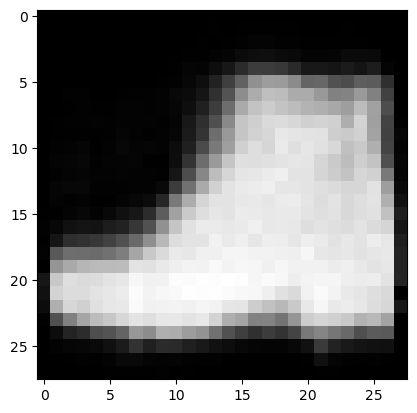

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 21.5089 - val_loss: 20.8417
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


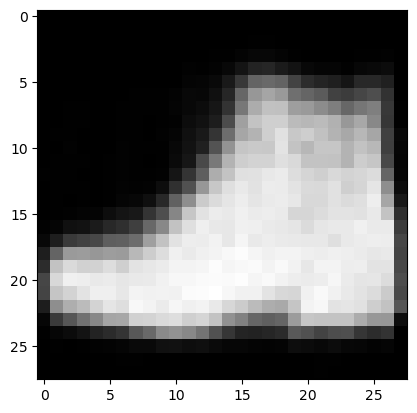

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 19.8230 - val_loss: 19.7971
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


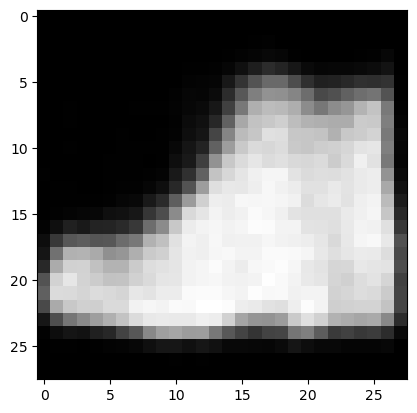

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 19.0895 - val_loss: 19.0914
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


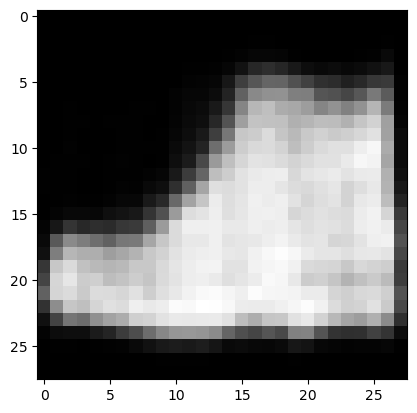

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 18.5053 - val_loss: 18.8392
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


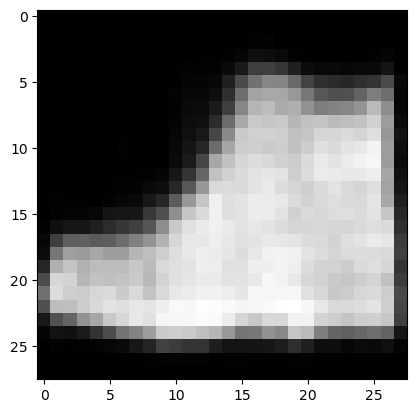

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 18.2334 - val_loss: 18.4682
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


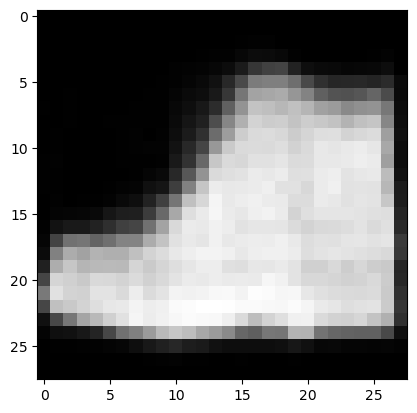

430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 17.7365 - val_loss: 18.3242
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


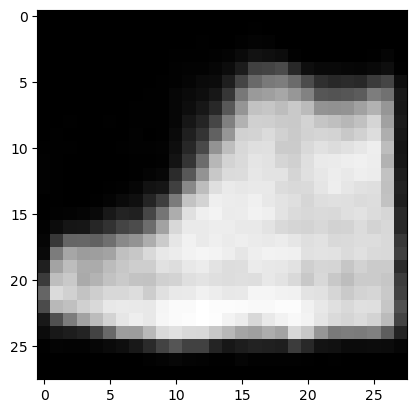

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 17.7020 - val_loss: 17.8994
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


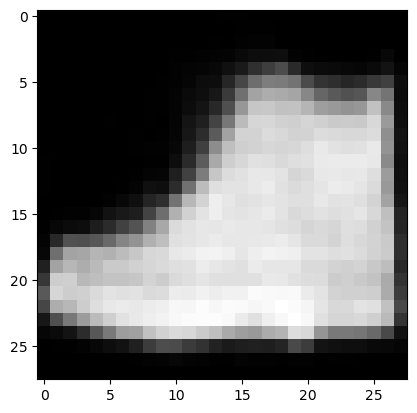

430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 17.3599 - val_loss: 17.6846
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


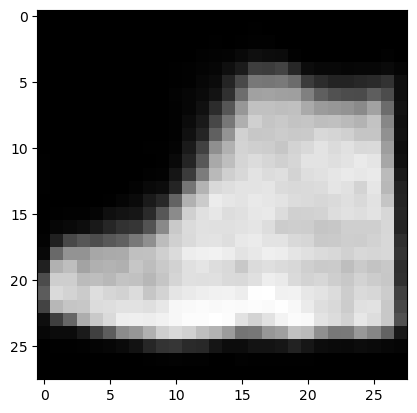

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 17.1704 - val_loss: 17.5513
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


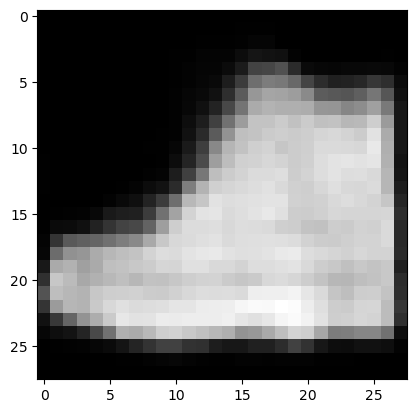

MODELO NÚMERO: 0
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 51.1135 - val_loss: 21.5385
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


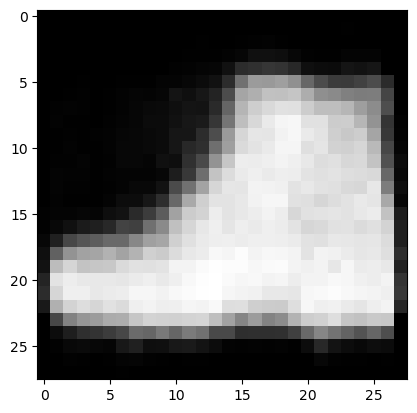

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 20.0536 - val_loss: 18.9159
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


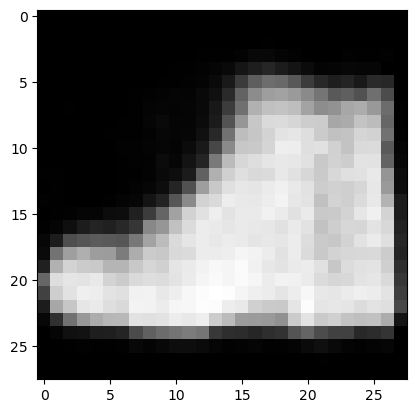

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 18.1114 - val_loss: 17.9204
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


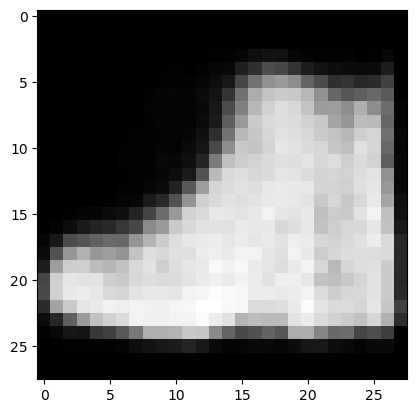

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 17.1665 - val_loss: 17.1459
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


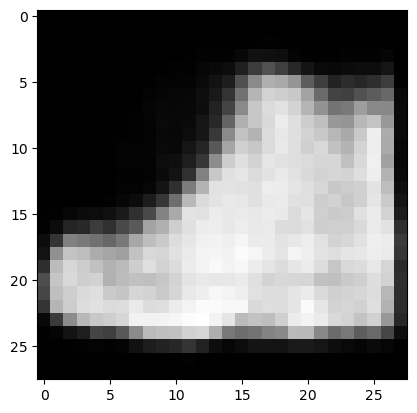

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 16.6340 - val_loss: 16.7499
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


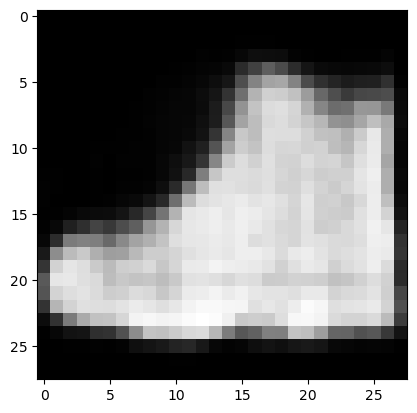

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 16.1404 - val_loss: 16.4891
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


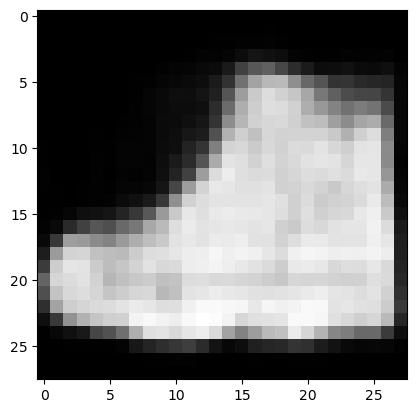

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 15.8008 - val_loss: 16.2913
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


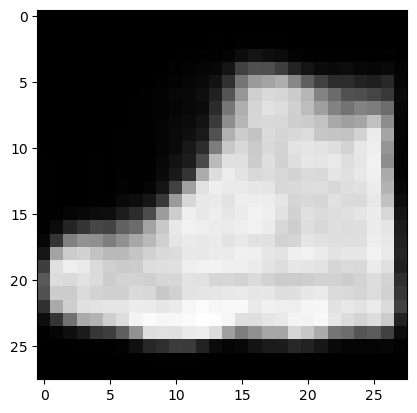

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 15.6074 - val_loss: 15.8987
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


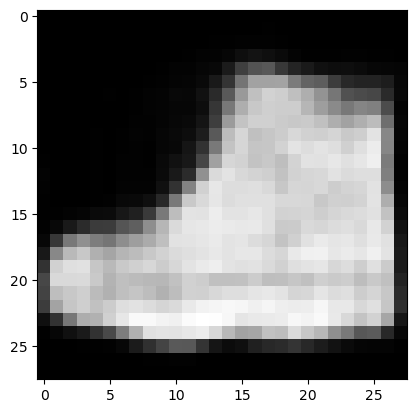

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 15.1706 - val_loss: 15.7068
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


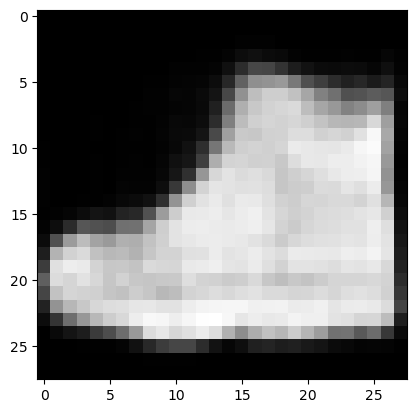

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 14.9655 - val_loss: 15.5559
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


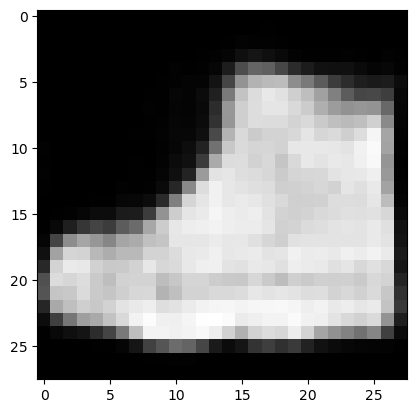

MODELO NÚMERO: 0
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 50.2993 - val_loss: 20.9504
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


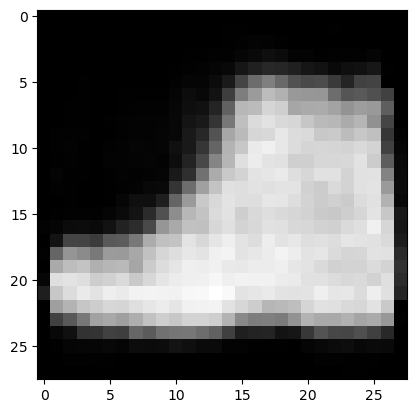

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 19.5769 - val_loss: 18.0661
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


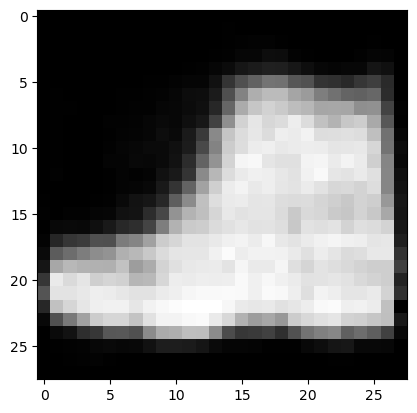

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 17.1412 - val_loss: 17.0038
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


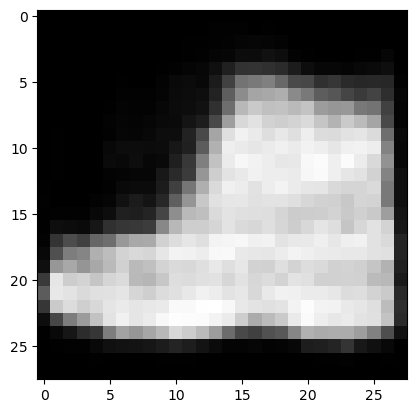

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 16.1461 - val_loss: 15.9538
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


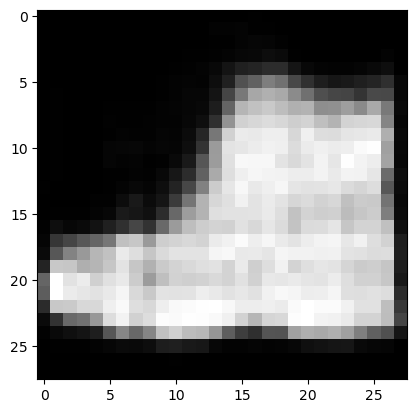

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 15.3294 - val_loss: 15.5292
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


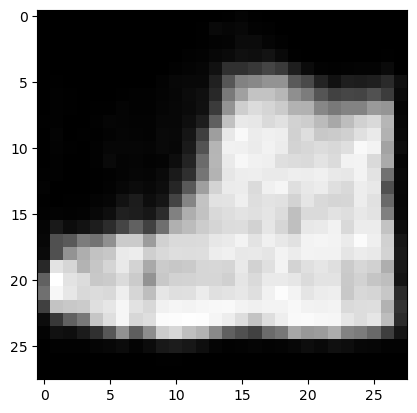

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 14.6730 - val_loss: 15.1100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


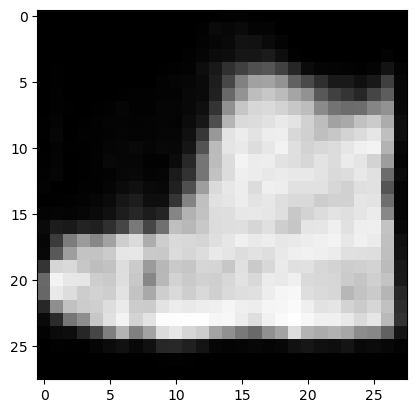

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 14.3667 - val_loss: 14.7105
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


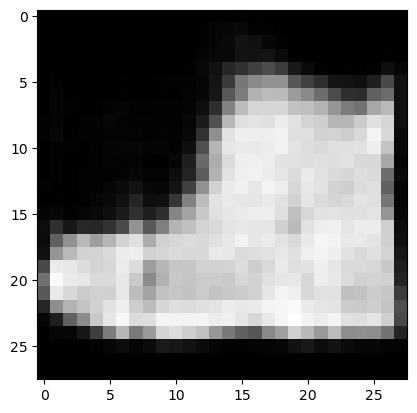

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 13.9643 - val_loss: 14.4320
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


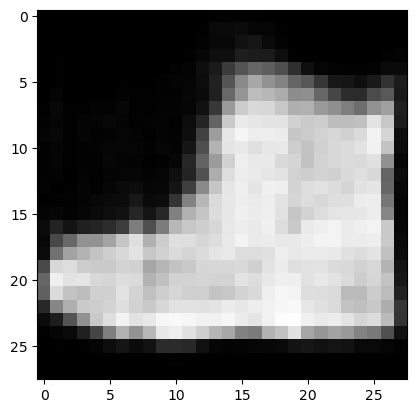

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 14.0726 - val_loss: 14.0765
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


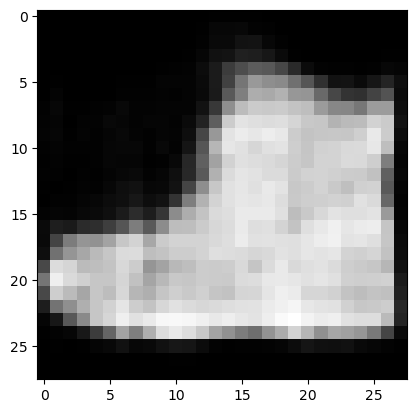

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 13.3699 - val_loss: 14.1036
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


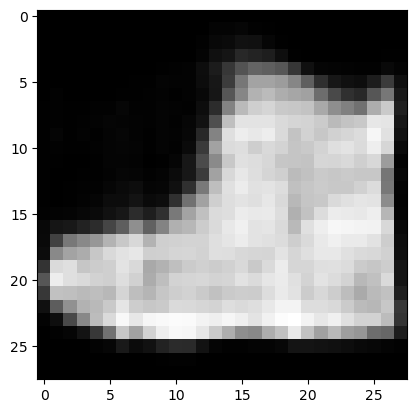

MODELO NÚMERO: 0
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 49.0730 - val_loss: 20.6588
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


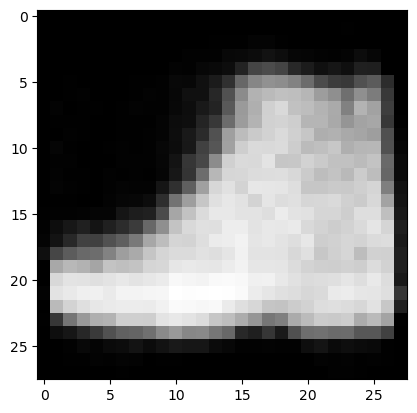

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 19.2615 - val_loss: 17.4700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


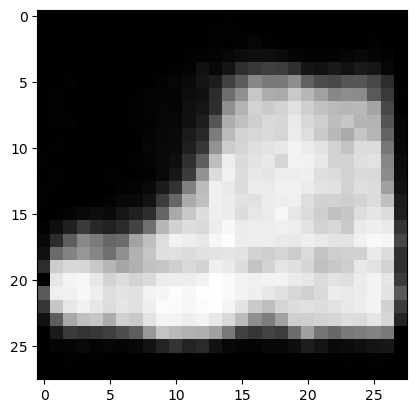

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 16.6627 - val_loss: 16.3086
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


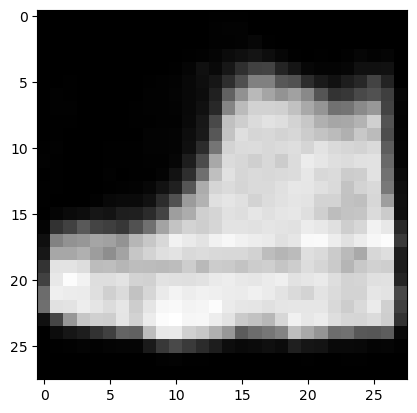

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 15.4928 - val_loss: 15.2446
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


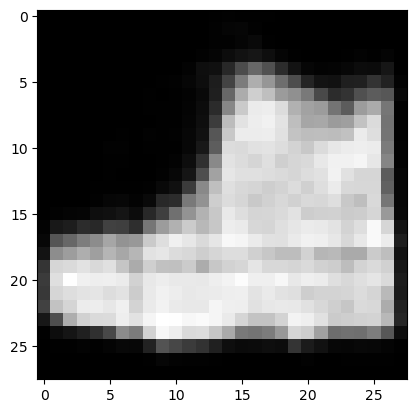

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 14.4583 - val_loss: 14.7118
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


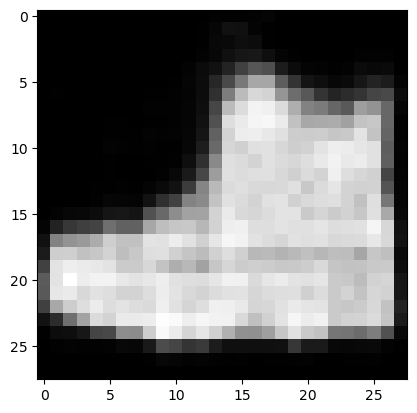

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 13.7619 - val_loss: 14.3756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


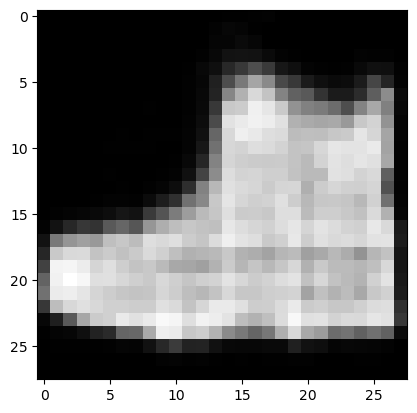

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 13.4571 - val_loss: 13.9406
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


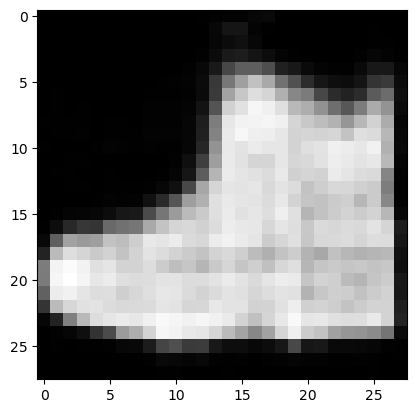

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 13.1200 - val_loss: 13.5541
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


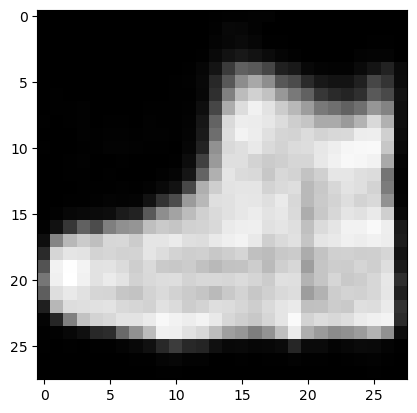

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 12.8477 - val_loss: 13.3314
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


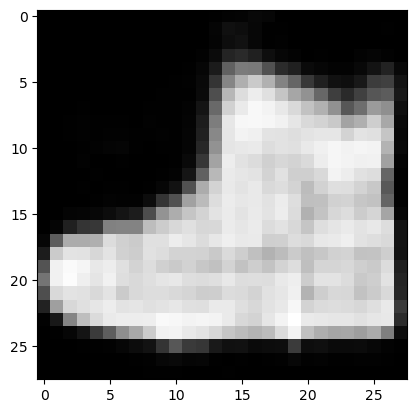

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 12.9353 - val_loss: 13.0955
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


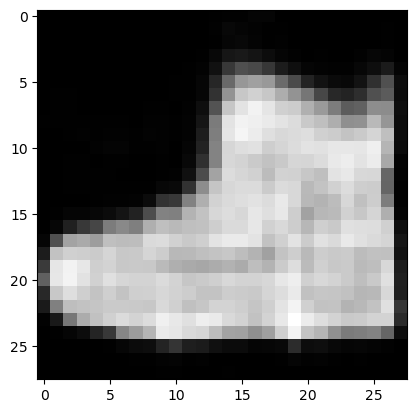

MODELO NÚMERO: 0
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 47.6608 - val_loss: 19.7809
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


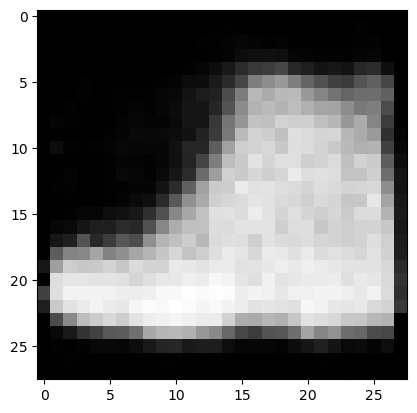

430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 18.4831 - val_loss: 16.7401
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


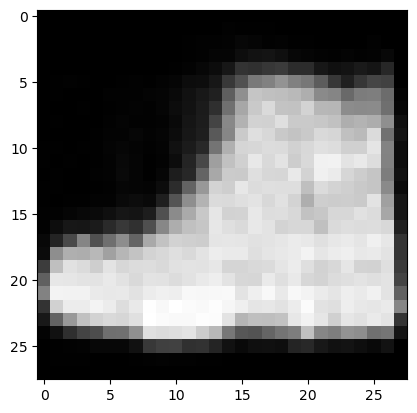

430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 16.2152 - val_loss: 15.6851
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


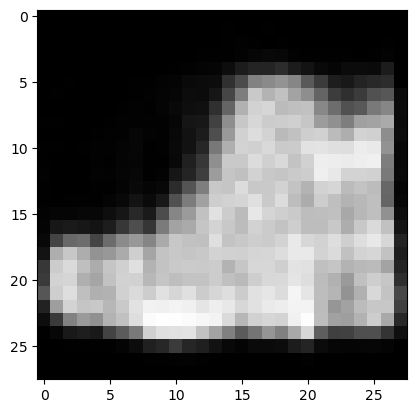

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 14.5311 - val_loss: 14.5533
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


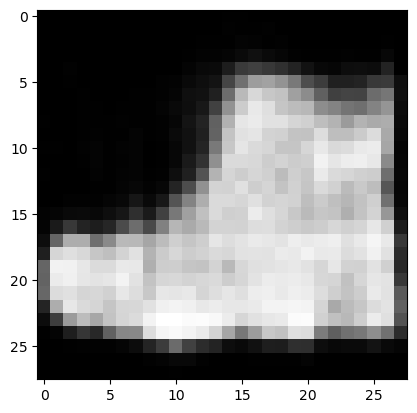

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 13.9994 - val_loss: 14.2282
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


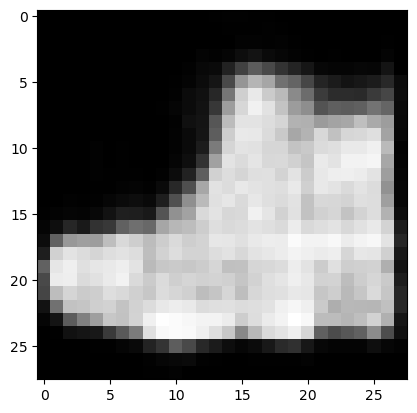

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 13.4213 - val_loss: 13.5213
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


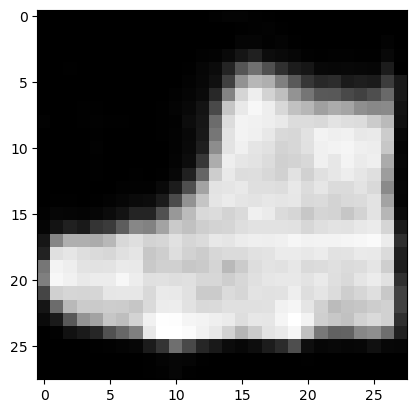

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 12.9904 - val_loss: 13.1126
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


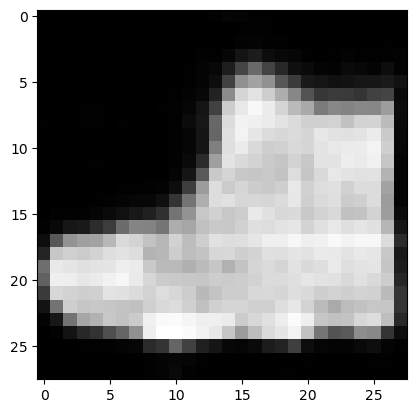

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 12.4598 - val_loss: 12.8264
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


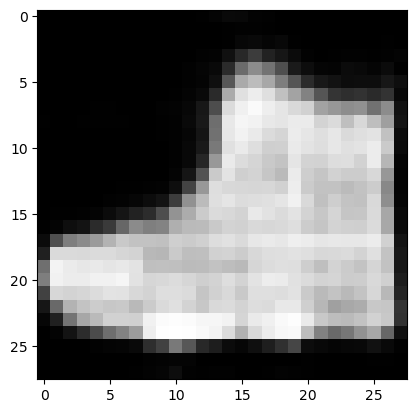

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 12.3149 - val_loss: 12.7238
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


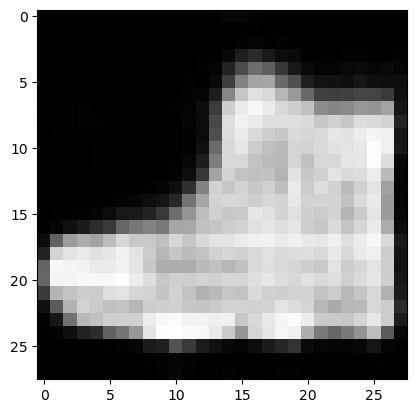

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 12.0007 - val_loss: 12.3663
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


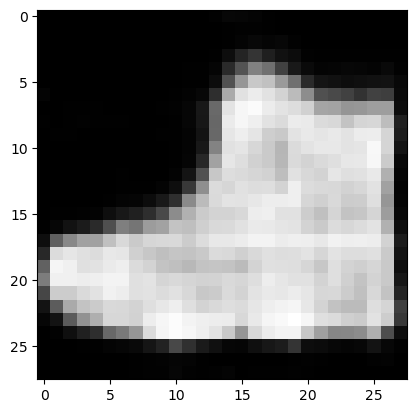

MODELO NÚMERO: 0
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 48.0756 - val_loss: 19.9856
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


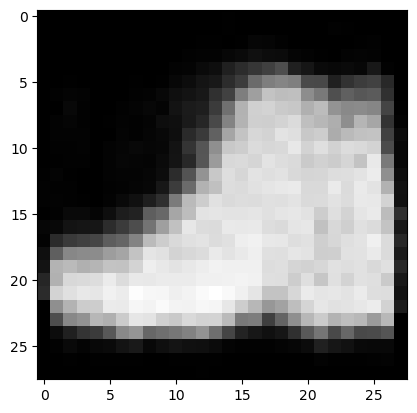

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 18.4564 - val_loss: 17.0116
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


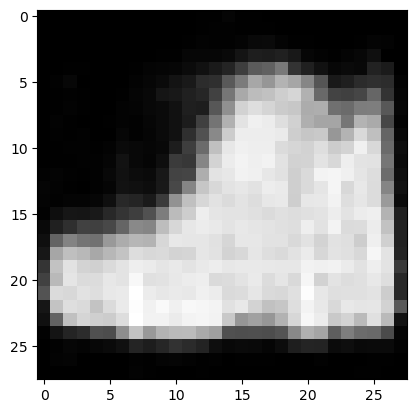

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 16.0004 - val_loss: 15.0750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


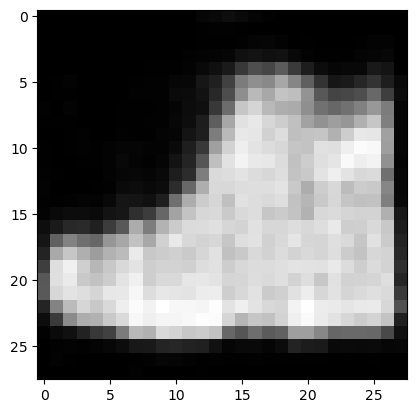

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 14.3367 - val_loss: 14.2760
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


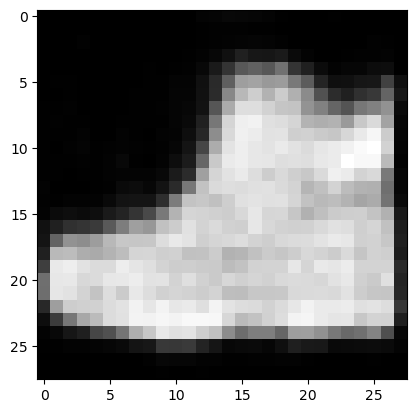

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 13.6984 - val_loss: 13.7513
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


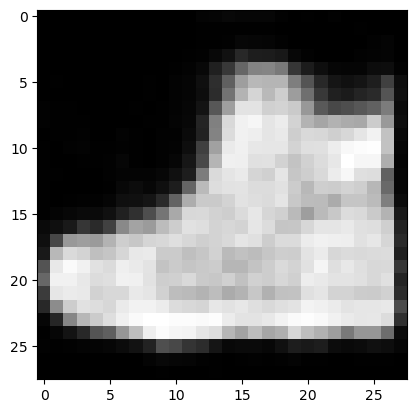

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 12.9385 - val_loss: 13.2436
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


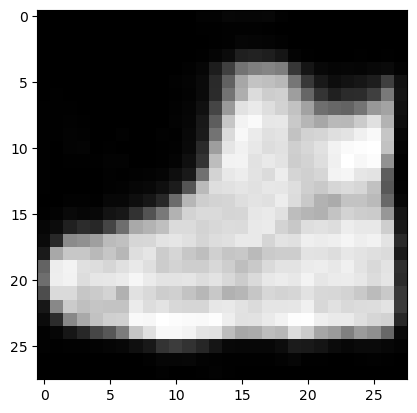

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 12.6642 - val_loss: 12.9699
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


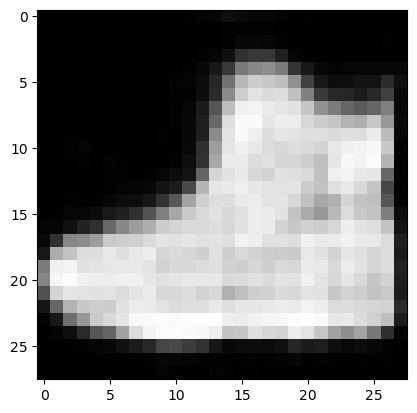

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 12.3544 - val_loss: 12.7518
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


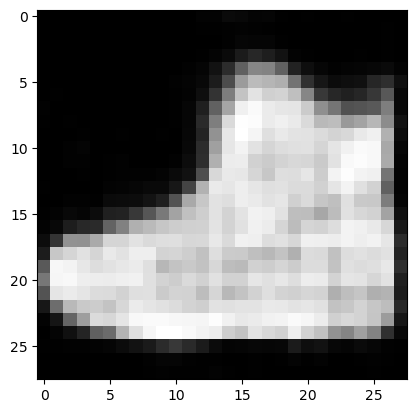

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 11.8291 - val_loss: 12.0945
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


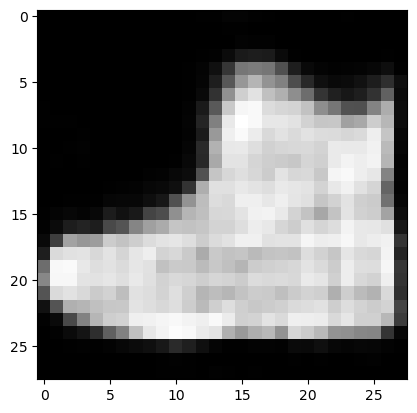

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 11.5626 - val_loss: 11.8731
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


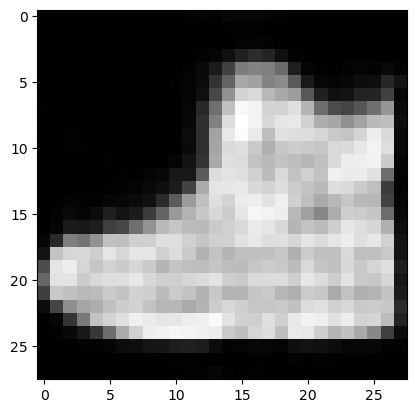

##############################################################


In [6]:
for vae in modelos:
    print(f"MODELO NÚMERO: 0")
    for i in range(10):
        train.train(vae, x_train, y_train, x_val, y_val)
        salida = vae.predict([img, cond, cond])
        reconstruccion = salida[0].reshape(28, 28)
        plt.imshow(reconstruccion, cmap='gray')
        plt.show()

print("##############################################################")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


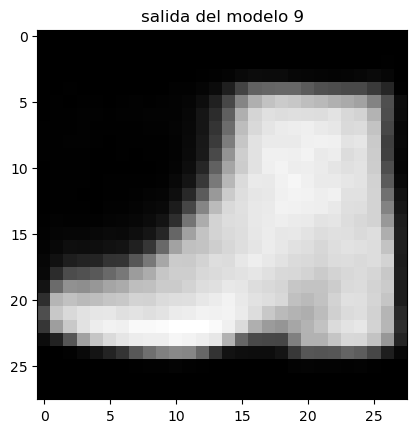

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


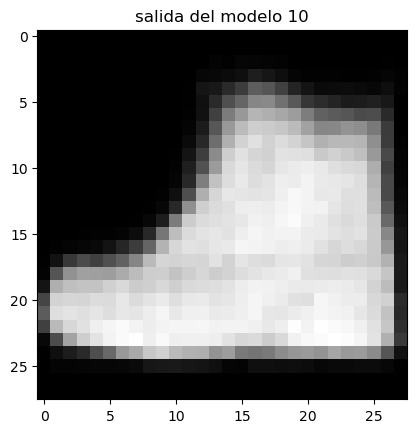

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


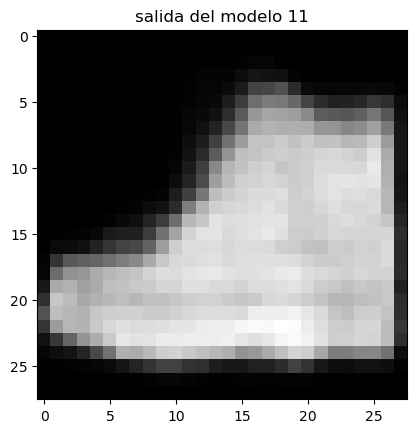

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


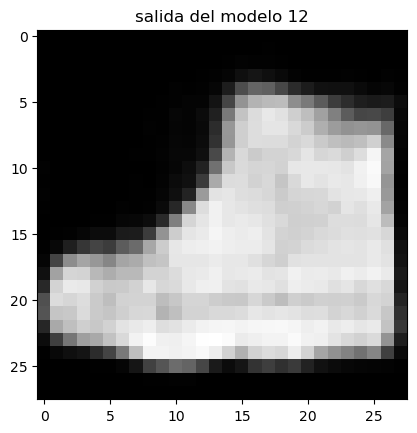

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


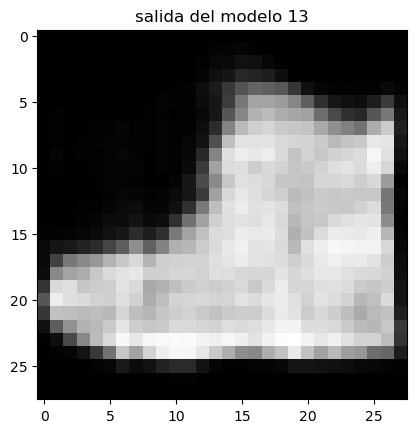

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


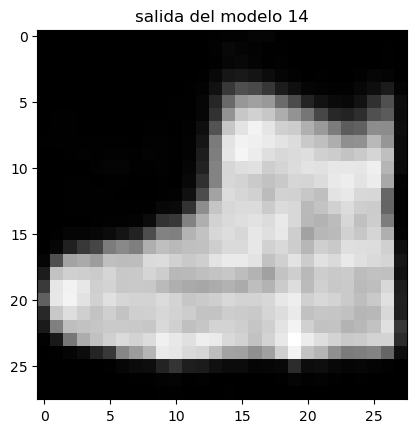

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


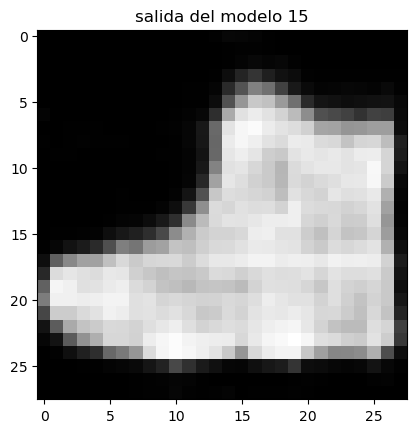

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


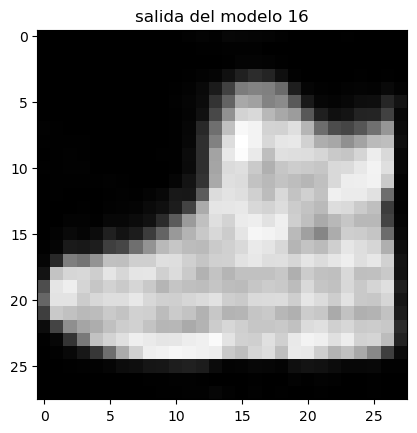

In [7]:
for vae in modelos: 
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

    #vae.compile(optimizer, loss=loss.vae_loss) #cambiar nombre

    img = np.expand_dims(x_train[0], axis=0)
    cond = np.expand_dims(y_train[0], axis=0)
    salida = vae.predict([img, cond,cond])

    reconstruccion = salida[0].reshape(28, 28)
    plt.imshow(reconstruccion, cmap='gray')
    plt.title(f"salida del modelo {i}")
    plt.show()
    i += 1

Model: "predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ original_input (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_layer (ReshapeLayer)    │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,186 (196.04 KB)

 Trainable params: 50,186 (196.04 KB)

 Non-trainable params: 0 (0.00 B)

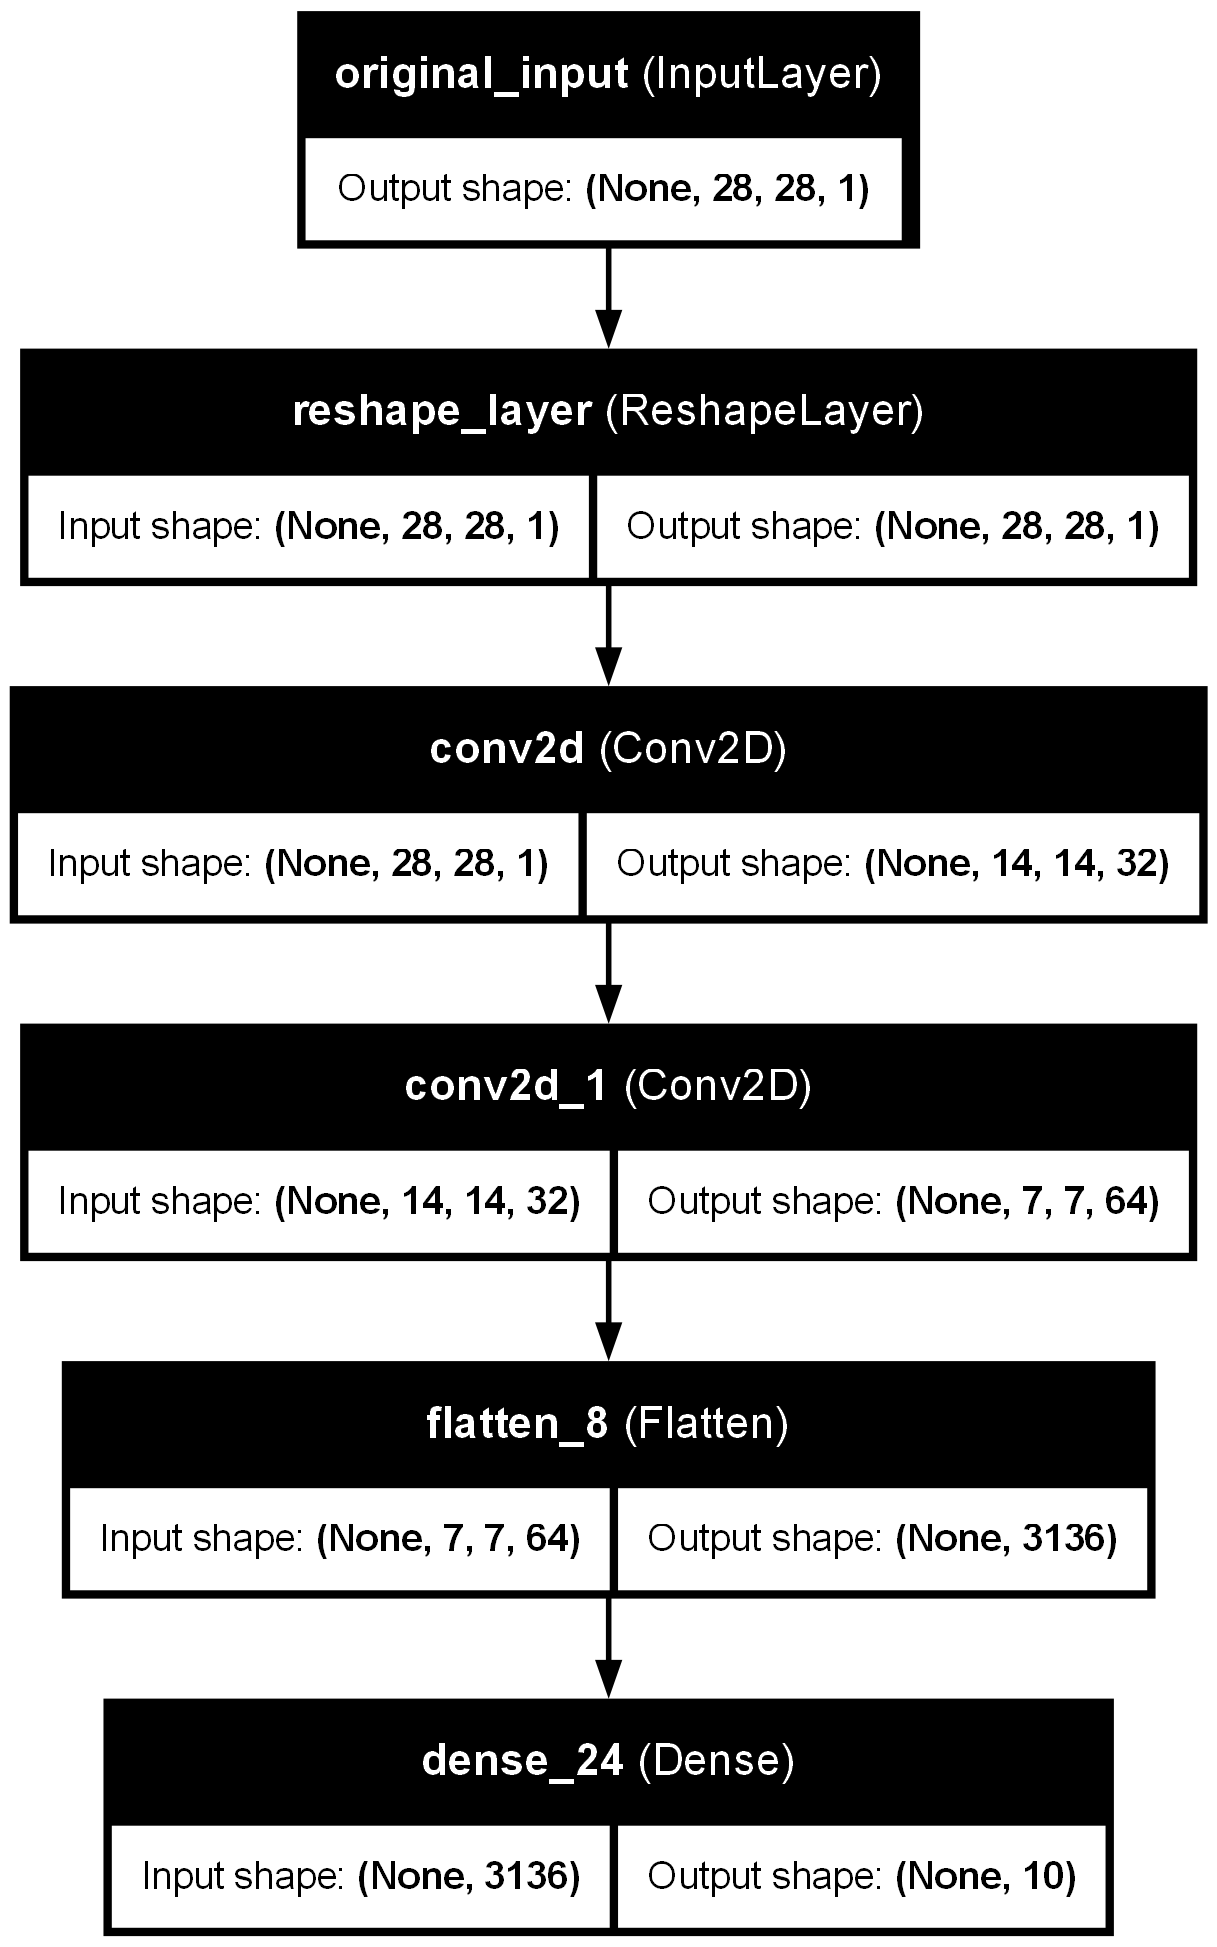

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


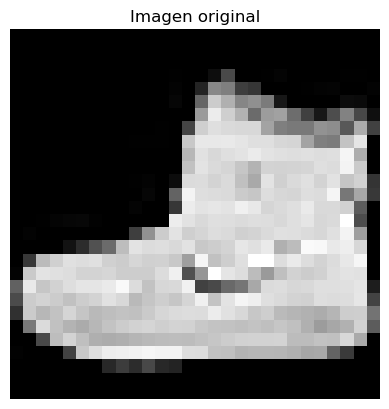

prediccion  8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.8398 - val_loss: 0.4001
prediccion  8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3878 - val_loss: 0.3513
prediccion  9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3380 - val_loss: 0.3173
prediccion  9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3100 - val_loss: 0.3180
prediccion  9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2862 - val_loss: 0.2934


In [8]:
predictor_c = Predictor.predictor()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
predictor_c.compile(optimizer, loss="categorical_crossentropy")
print(img.shape)
prediccion = np.argmax( predictor_c.predict(img))
img[0].reshape(28, 28)
plt.imshow(img[0], cmap='gray')
plt.title("Imagen original")
plt.axis('off')
plt.show()

for i in range(5): 
    #reconstruccion = prediccion[0].reshape(28, 28)
    print(f"prediccion  {prediccion}")
    prediccion = np.argmax(predictor_c.predict(img))


    predictor_c.fit(
        x=x_train,
        y=y_train,
        batch_size=128,
        epochs=1,
        validation_data=(x_val, y_val)  # Include validation data
        )

MODELO NÚMERO: 0


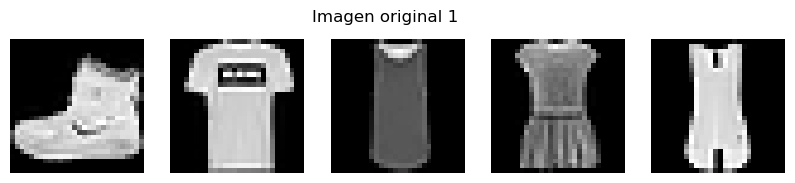

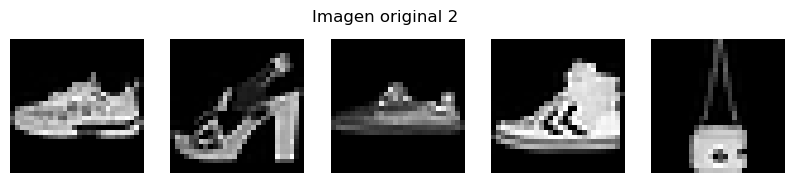

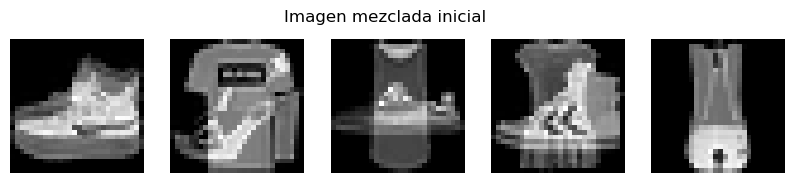

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
ITERACIÓN A: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
tf.Tensor(
[0.6381     0.6868783  0.15904738 0.21034963 0.877257   0.84090924
 0.6422723  0.7611967  0.16298744 0.38242257], shape=(10,), dtype=float32)
tf.Tensor(
[0.24279034 0.41259596 0.40688065 0.29711094 0.30754745 0.11854902
 0.29401243 0.40608063 0.0332324  0.10541017], shape=(10,), dtype=float32)
tf.Tensor(
[0.44044518 0.54973716 0.28296402 0.2537303  0.5924022  0.47972912
 0.46814236 0.58363867 0.09810992 0.24391636], shape=(10,), dtype=float32)
tf.Tensor(
[0.55070895 0.040695   0.25436792 0.11478817 0.46418664 0.05902681
 0.4848434  0.2749221  0.55314183 0.5420639 ], shape=(10,), dtype=float32)
tf.Tensor(
[0.21599343 0.17559376 0.31358168 0.6187292  0.19684908 0.09725554
 0.35522974 0.15757152 0.6944

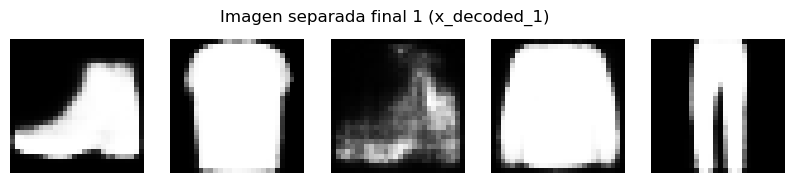

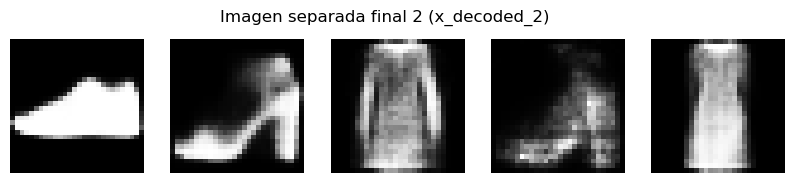

MODELO NÚMERO: 0


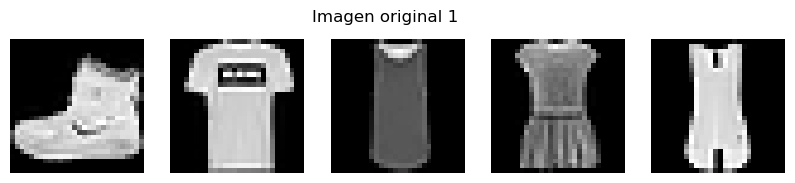

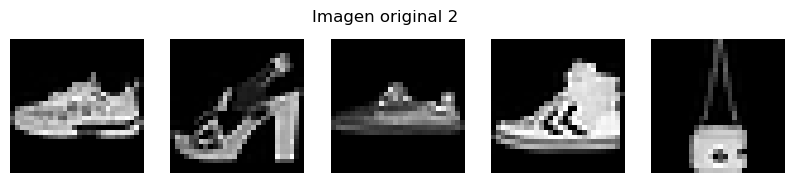

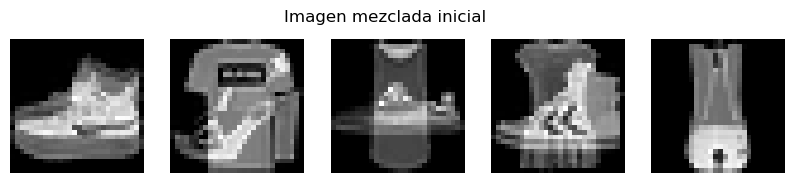

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
ITERACIÓN A: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
tf.Tensor(
[0.5449914  0.736968   0.23957069 0.28721207 0.88076615 0.86137444
 0.6586515  0.7336773  0.153566   0.38912475], shape=(10,), dtype=float32)
tf.Tensor(
[0.47583252 0.41681096 0.47555542 0.20148861 0.3671057  0.1049782
 0.4260715  0.32986555 0.02507824 0.15846902], shape=(10,), dtype=float32)
tf.Tensor(
[0.510412   0.57688946 0.35756305 0.24435034 0.62393594 0.48317632
 0.5423615  0.5317714  0.08932212 0.2737969 ], shape=(10,), dtype=float32)
tf.Tensor(
[0.45149785 0.0639786  0.2861761  0.26164603 0.3812534  0.0237354
 0.40704915 0.30598468 0.5264389  0.55984706], shape=(10,), dtype=float32)
tf.Tensor(
[0.30704919 0.13275136 0.45991343 0.5913617  0.18129422 0.08651152
 0.31246686 0.15618701 0.731463

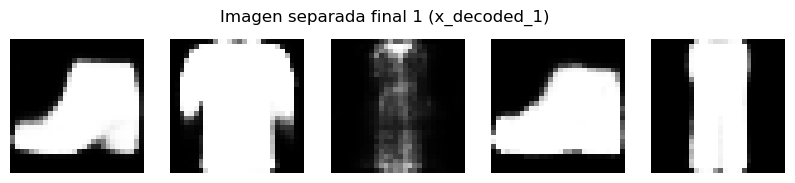

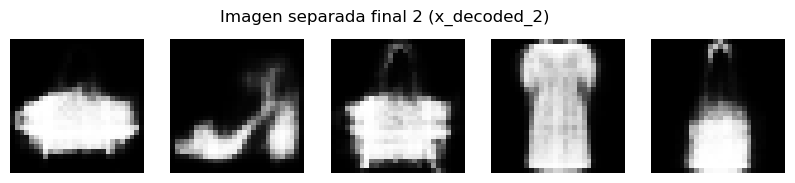

MODELO NÚMERO: 0


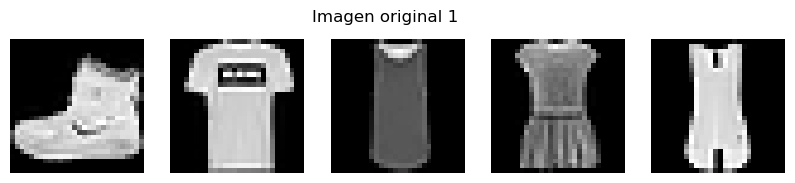

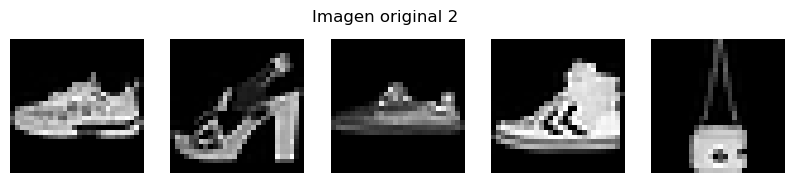

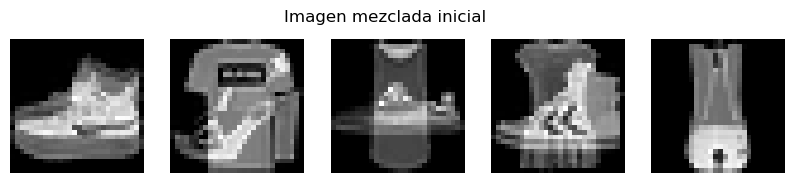

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
ITERACIÓN A: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
tf.Tensor(
[0.5362804  0.6947354  0.2206849  0.28534088 0.8206141  0.8486754
 0.6721242  0.751881   0.1500613  0.38888246], shape=(10,), dtype=float32)
tf.Tensor(
[0.47843948 0.2943015  0.45897976 0.21224561 0.4413276  0.27721557
 0.5092202  0.4057382  0.0396333  0.24727045], shape=(10,), dtype=float32)
tf.Tensor(
[0.5073599  0.49451846 0.33983234 0.24879324 0.63097084 0.5629455
 0.5906722  0.5788096  0.0948473  0.31807646], shape=(10,), dtype=float32)
tf.Tensor(
[0.3456947  0.05720238 0.33986196 0.3936128  0.3235656  0.01891324
 0.4579944  0.2519781  0.32687783 0.37818983], shape=(10,), dtype=float32)
tf.Tensor(
[0.32926512 0.15061297 0.498451   0.5709443  0.19384848 0.08079892
 0.3032566  0.15633059 0.719501

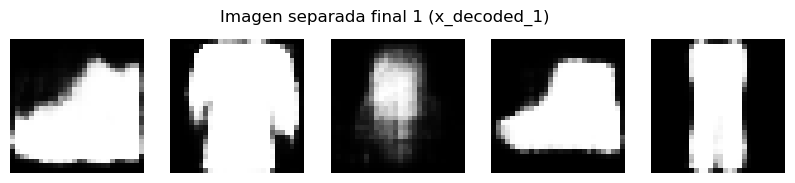

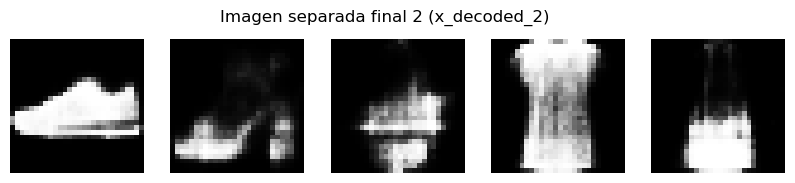

MODELO NÚMERO: 0


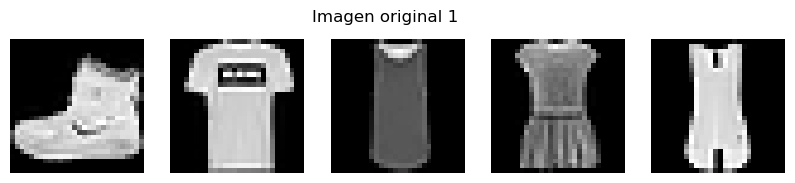

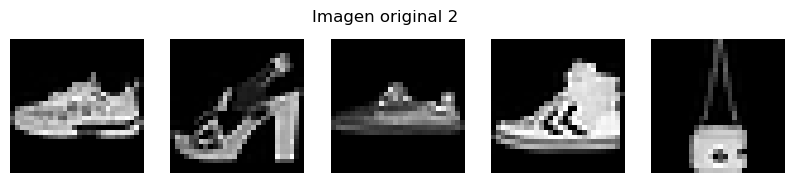

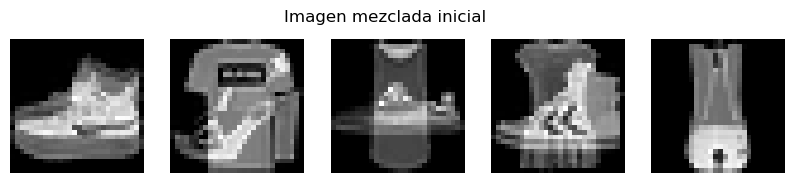

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
ITERACIÓN A: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
tf.Tensor(
[0.60779333 0.70386845 0.2996107  0.24056566 0.8073657  0.86317813
 0.67137295 0.7332424  0.1533268  0.38668302], shape=(10,), dtype=float32)
tf.Tensor(
[0.5815598  0.39957267 0.33393615 0.25545958 0.42481166 0.2079204
 0.53125393 0.38747698 0.07394083 0.14338636], shape=(10,), dtype=float32)
tf.Tensor(
[0.59467655 0.55172056 0.3167734  0.24801262 0.6160887  0.5355493
 0.6013135  0.5603597  0.11363381 0.26503468], shape=(10,), dtype=float32)
tf.Tensor(
[0.28150058 0.07420737 0.25357157 0.32373595 0.35706088 0.03316393
 0.46041447 0.26911336 0.240692   0.53996885], shape=(10,), dtype=float32)
tf.Tensor(
[0.2728042  0.14671175 0.47804934 0.5636072  0.19810815 0.07961856
 0.30676052 0.15652384 0.673872

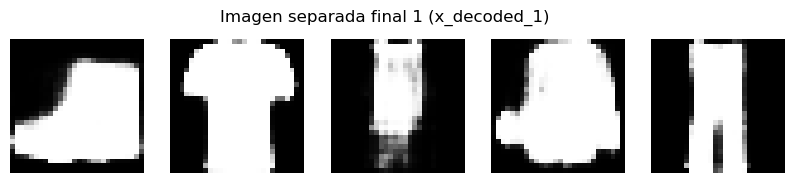

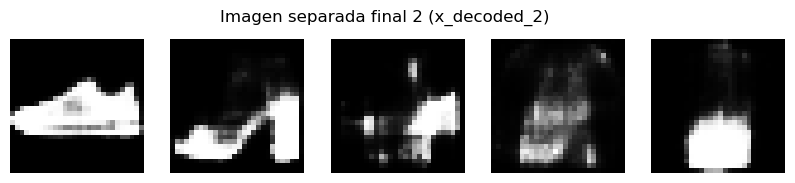

MODELO NÚMERO: 0


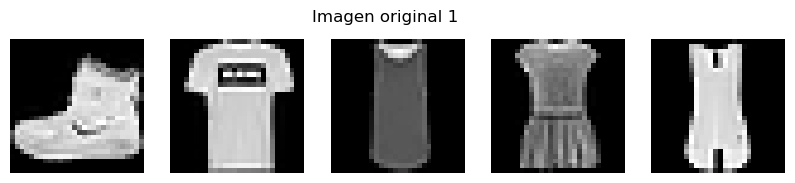

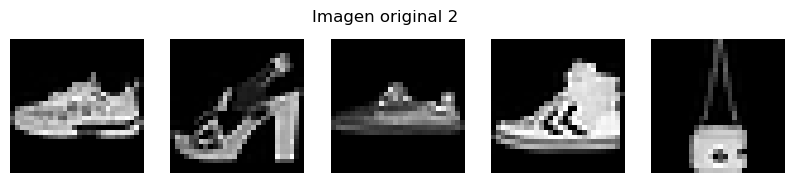

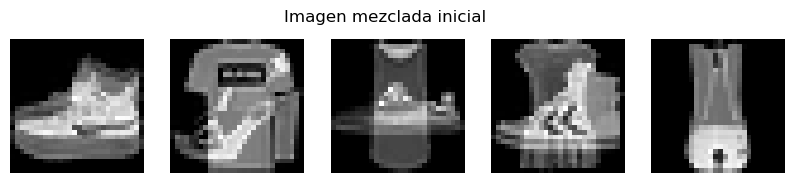

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
ITERACIÓN A: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
tf.Tensor(
[0.47509497 0.6597095  0.2637802  0.2171391  0.796787   0.8548154
 0.6298452  0.71665764 0.16894701 0.4286127 ], shape=(10,), dtype=float32)
tf.Tensor(
[0.3531089  0.35349134 0.107907   0.2593175  0.4998738  0.13060978
 0.5377889  0.3930402  0.10773273 0.26472947], shape=(10,), dtype=float32)
tf.Tensor(
[0.41410196 0.50660044 0.1858436  0.23822829 0.6483304  0.49271262
 0.58381706 0.5548489  0.13833988 0.3466711 ], shape=(10,), dtype=float32)
tf.Tensor(
[0.5031586  0.1868823  0.29217678 0.28598577 0.2516541  0.04835996
 0.43862435 0.23484369 0.29020047 0.3596681 ], shape=(10,), dtype=float32)
tf.Tensor(
[0.36500087 0.12506616 0.50188637 0.5486218  0.20570925 0.08687182
 0.33525628 0.16141959 0.58690

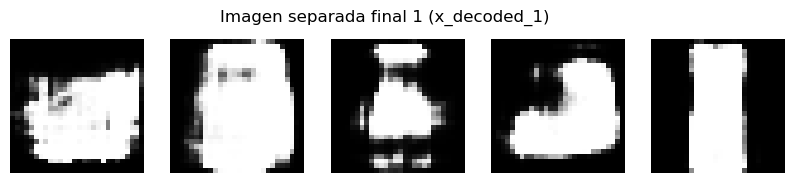

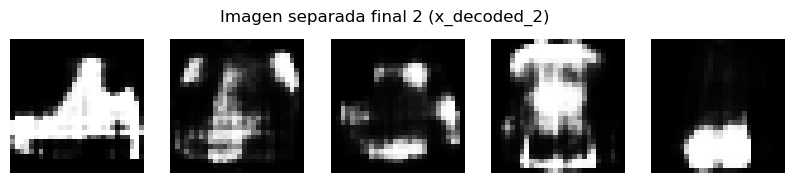

MODELO NÚMERO: 0


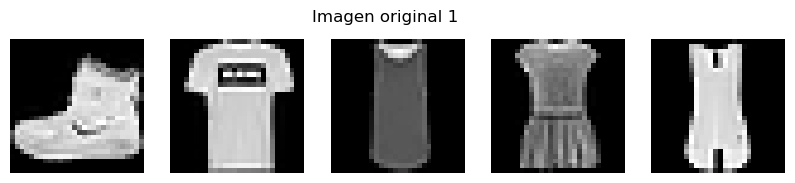

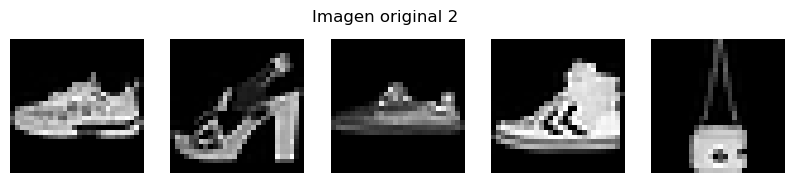

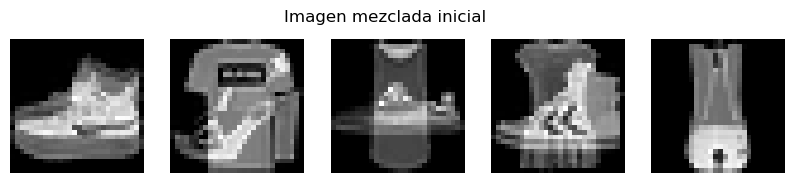

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
ITERACIÓN A: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
tf.Tensor(
[0.58395463 0.6827     0.27001208 0.21433079 0.8250581  0.84324855
 0.67950183 0.69365484 0.16621351 0.42450866], shape=(10,), dtype=float32)
tf.Tensor(
[0.58010083 0.3295358  0.11046004 0.31892192 0.51159334 0.20433821
 0.5646349  0.382216   0.10177059 0.3076179 ], shape=(10,), dtype=float32)
tf.Tensor(
[0.58202773 0.5061179  0.19023606 0.26662636 0.6683257  0.5237934
 0.6220684  0.53793544 0.13399205 0.3660633 ], shape=(10,), dtype=float32)
tf.Tensor(
[0.2875921  0.11774197 0.22874442 0.35085315 0.24758717 0.07015937
 0.40495643 0.25885352 0.11617178 0.34435603], shape=(10,), dtype=float32)
tf.Tensor(
[0.29720885 0.09361473 0.49687266 0.5477995  0.1985913  0.09790701
 0.3055098  0.16058917 0.52725

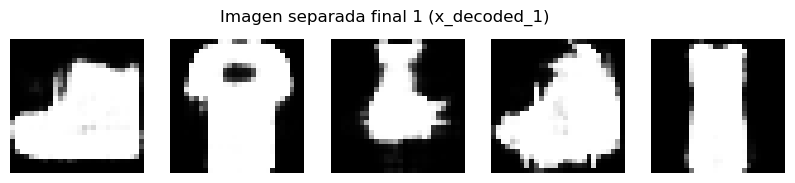

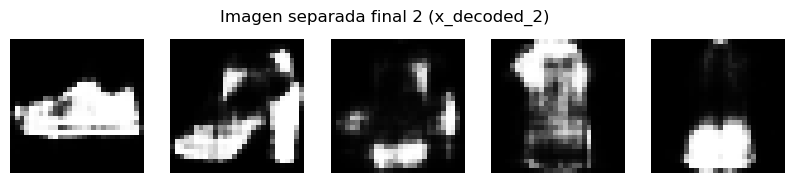

MODELO NÚMERO: 0


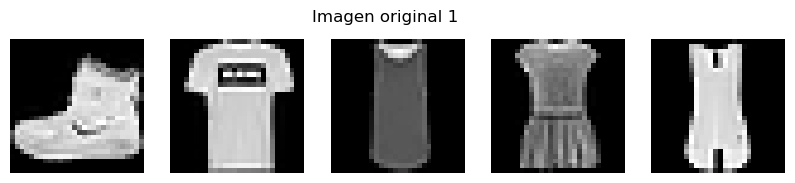

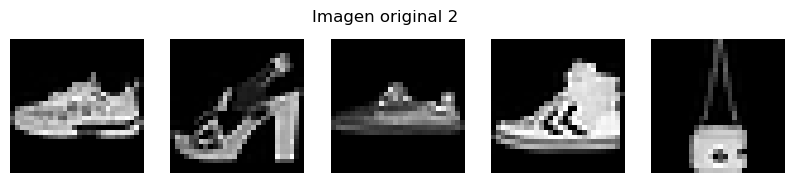

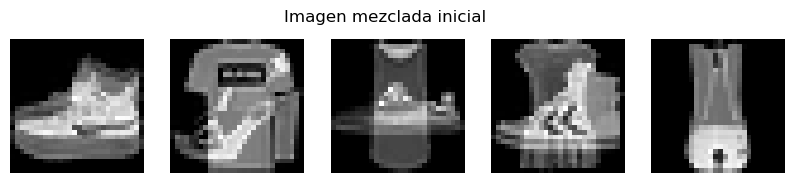

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
ITERACIÓN A: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
tf.Tensor(
[0.5398014  0.69099736 0.27404103 0.17548262 0.8422098  0.84852993
 0.6971055  0.6832032  0.16508538 0.41230938], shape=(10,), dtype=float32)
tf.Tensor(
[0.45609632 0.400237   0.14523141 0.26218545 0.44494987 0.18074839
 0.6077308  0.3604034  0.12301406 0.28014505], shape=(10,), dtype=float32)
tf.Tensor(
[0.49794888 0.54561716 0.20963621 0.21883404 0.64357984 0.51463914
 0.65241814 0.5218033  0.14404972 0.34622723], shape=(10,), dtype=float32)
tf.Tensor(
[0.38874027 0.13109018 0.23957828 0.45302913 0.26942617 0.03555499
 0.34995723 0.24854203 0.16620384 0.29558244], shape=(10,), dtype=float32)
tf.Tensor(
[0.3315377  0.119347   0.48651627 0.5974897  0.1959515  0.09596025
 0.30404985 0.16331324 0.5166

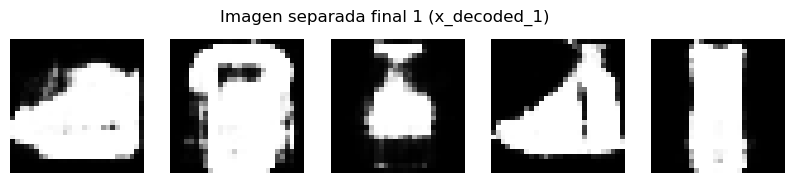

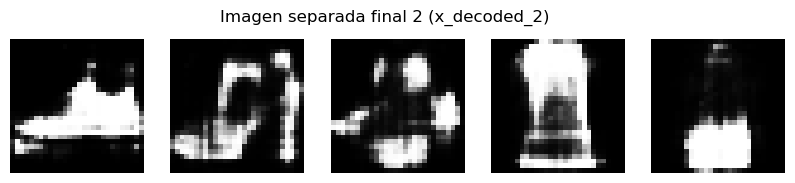

MODELO NÚMERO: 0


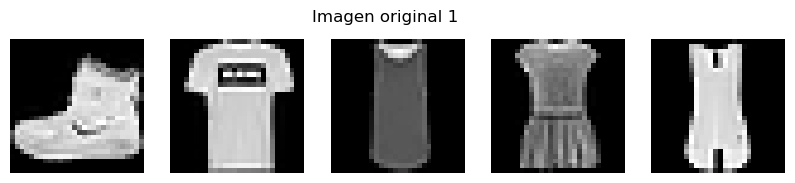

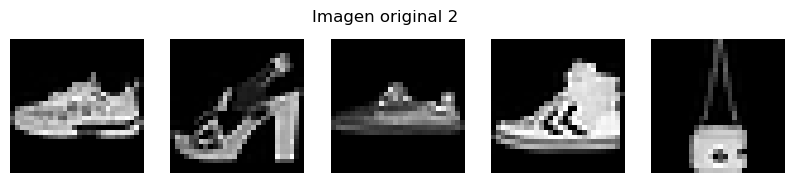

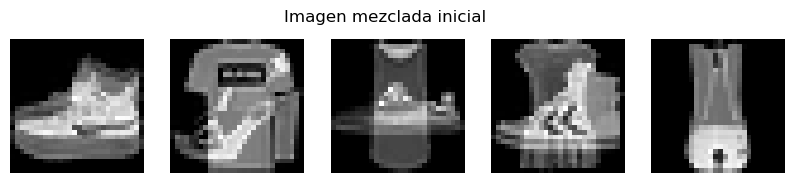

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
ITERACIÓN A: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
tf.Tensor(
[0.50287884 0.6807331  0.26783702 0.26529115 0.83173907 0.8539815
 0.6468463  0.7295789  0.16281277 0.43042985], shape=(10,), dtype=float32)
tf.Tensor(
[0.4965649  0.38327816 0.17105633 0.27884388 0.4840572  0.18211065
 0.6322331  0.4623832  0.06206151 0.27006197], shape=(10,), dtype=float32)
tf.Tensor(
[0.49972188 0.5320056  0.21944667 0.27206752 0.6578981  0.5180461
 0.6395397  0.59598106 0.11243714 0.3502459 ], shape=(10,), dtype=float32)
tf.Tensor(
[0.3400617  0.13468888 0.1731863  0.28224736 0.25232625 0.04935475
 0.34696057 0.19664581 0.23202091 0.29940674], shape=(10,), dtype=float32)
tf.Tensor(
[0.33260822 0.11702712 0.5106356  0.5440896  0.20814028 0.08815723
 0.32139808 0.16022383 0.571857

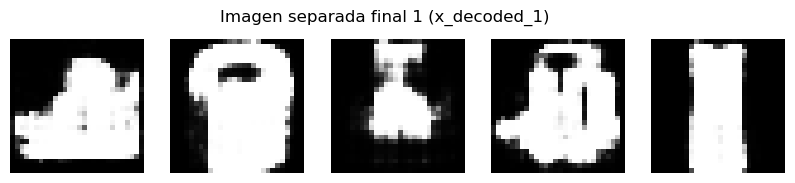

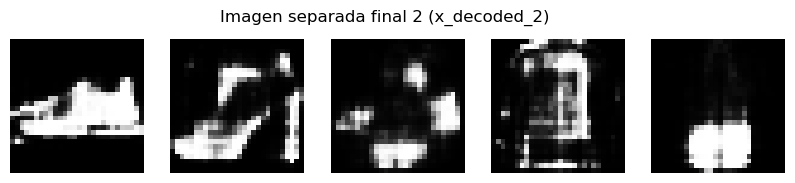

##############################################################
cambio de modelo


In [9]:
import inferencias
importlib.reload(inferencias)
# Suponiendo que ya tienes definidos:
# x_train, x_train_1, y_train, y_train_1, predictor, encoder, decoder
encoder=0
decoder=0
for vae in modelos:
    print(f"MODELO NÚMERO: 0")
                                #x_train, x_train_1, y_train, predictor, y_train_1,
    inferencias.inferncia_modelo(x_train[0:10], x_train_1[0:10], y_train[0:10], predictor_c,encoder,decoder ,y_train_1[0:10],vae)

print("##############################################################")
print("cambio de modelo")


